<a href="https://colab.research.google.com/github/timothykmulenga/profile_projects/blob/master/Artistic_Colorizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Deoldify and Fastai 

Special thanks to:

Matt Robinson and María Benavente for pioneering the DeOldify image colab notebook

Note that this notebook uses GPU as an accelerator.


In [1]:
#firt clone the deoldify library from git hub 

!git clone https://github.com/jantic/DeOldify.git DeOldify 

Cloning into 'DeOldify'...
remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 2070 (delta 0), reused 1 (delta 0), pack-reused 2067
Receiving objects: 100% (2070/2070), 69.33 MiB | 30.15 MiB/s, done.
Resolving deltas: 100% (926/926), done.


In [5]:
cd DeOldify # insure that you run  the notebook in the same directory with the downloaded repository

[Errno 2] No such file or directory: 'DeOldify # insure that you run the notebook in the same directory with the downloaded repository'
/content/DeOldify


In [0]:
#install the fastai library
!pip install fastai

#◢ Setup

In [0]:
# import the important libraries
from deoldify import device
from deoldify.device_id import DeviceId


In [0]:
!pip install -r colab_requirements.txt

In [0]:
import fastai
from deoldify.visualize import *
from fastai import *

In [0]:
!mkdir 'models'
!wget https://www.dropbox.com/s/zkehq1uwahhbc2o/ColorizeArtistic_gen.pth?dl=0 -O ./models/ColorizeArtistic_gen.pth

In [0]:
!wget https://media.githubusercontent.com/media/jantic/DeOldify/master/resource_images/watermark.png -O ./resource_images/watermark.png

In [0]:
colorizer = get_image_colorizer(artistic=True)

#◢ Instructions

### source_url
Type in a url to a direct link of an image.  Usually that means they'll end in .png, .jpg, etc. NOTE: If you want to use your own image, upload it first to a site like Imgur. 

### render_factor
The default value of 35 has been carefully chosen and should work -ok- for most scenarios (but probably won't be the -best-). This determines resolution at which the color portion of the image is rendered. Lower resolution will render faster, and colors also tend to look more vibrant. Older and lower quality images in particular will generally benefit by lowering the render factor. Higher render factors are often better for higher quality images, but the colors may get slightly washed out. 

### watermarked
Selected by default, this places a watermark icon of a palette at the bottom left corner of the image.  This is intended to be a standard way to convey to others viewing the image that it is colorized by AI. We want to help promote this as a standard, especially as the technology continues to improve and the distinction between real and fake becomes harder to discern. This palette watermark practice was initiated and lead by the company MyHeritage in the MyHeritage In Color feature (which uses a newer version of DeOldify than what you're using here).

#### How to Download a Copy
Simply right click on the displayed image and click "Save image as..."!

## Pro Tips

You can evaluate how well the image is rendered at each render_factor by using the code at the bottom (that cell under "See how well render_factor values perform on a frame here"). 

#◢ Colorize!!

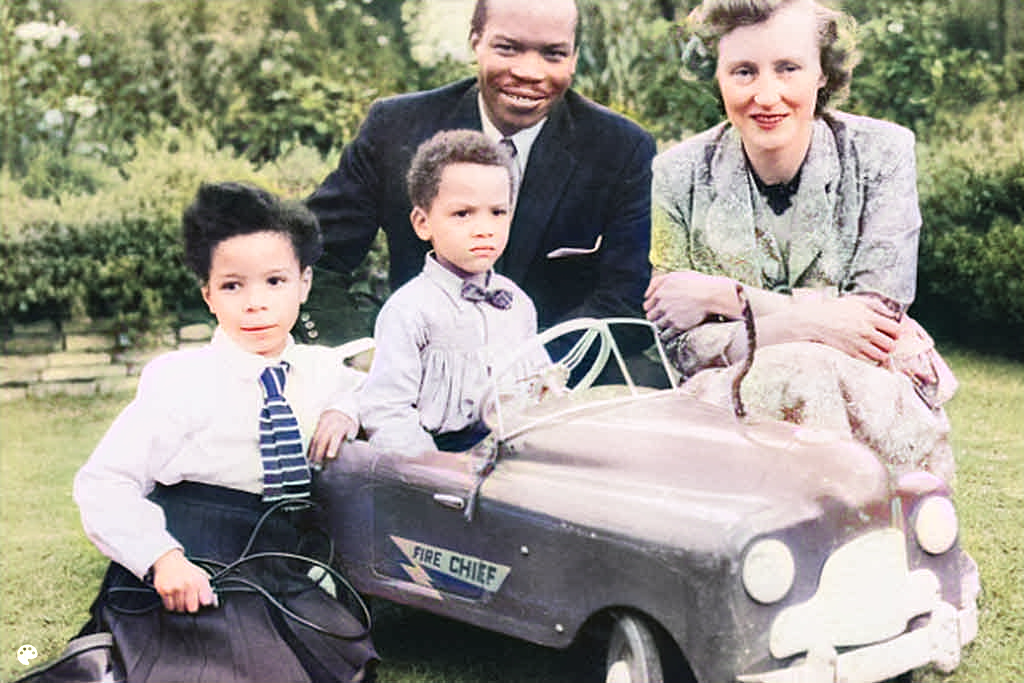

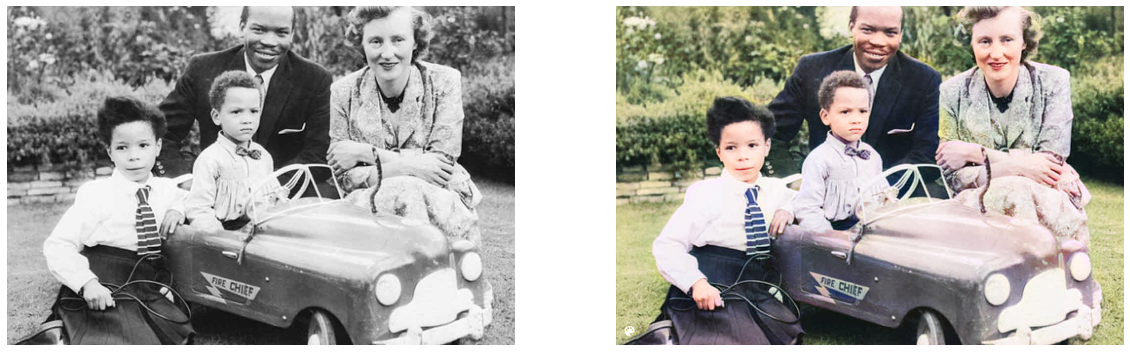

In [13]:
source_url = 'https://www.thegazette.news/wp-content/uploads/2016/07/T4-Old-Photo-of-the-Seretse-khama-family-Pic-Betmann.jpg' #@param {type:"string"}
render_factor = 35  #@param {type: "slider", min: 7, max: 40}
watermarked = True #@param {type:"boolean"}

if source_url is not None and source_url !='':
    image_path = colorizer.plot_transformed_image_from_url(url=source_url, render_factor=render_factor, compare=True, watermarked=watermarked)
    show_image_in_notebook(image_path)
else:
    print('Provide an image url and try again.')

## See how well render_factor values perform on the image here

In [0]:
for i in range(10,40,2):
    colorizer.plot_transformed_image('test_images/image.png', render_factor=i, display_render_factor=True, figsize=(8,8))